In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
df = pd.read_csv("COVID clinical trials.csv")

In [4]:
df.head()
df.shape
df.info()
df.describe(include = 'object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
count,5783,5783,2480,5783,5783,5783,4897,5748,5783,5773,...,5782,5749,5747,5747,5783,36,5783,5198,182,5783
unique,5783,5775,2338,12,2,3067,4337,5687,3631,3,...,5734,654,877,978,438,33,269,4255,182,5783
top,NCT04680000,Acalabrutinib Study With Best Supportive Care ...,COVID-19,Recruiting,No Results Available,COVID-19,Other: No intervention,Mortality,Assistance Publique - Hôpitaux de Paris,All,...,COVID-19,"May 1, 2020","December 31, 2020","December 31, 2021","April 24, 2020","November 4, 2020","April 8, 2021","Uhmontpellier, Montpellier, France","""Statistical Analysis Plan"", https://ClinicalT...",https://ClinicalTrials.gov/show/NCT04680000
freq,1,2,47,2805,5747,720,32,5,78,5567,...,6,113,122,179,108,2,109,19,1,1


In [5]:
missing = df.isnull().mean() * 100
missing.sort_values(ascending = False)

,0
Results First Posted,99.377486
Study Documents,96.852845
Acronym,57.115684
Phases,42.555767
Interventions,15.320768
Locations,10.115857
Primary Completion Date,0.622514
Completion Date,0.622514
Study Designs,0.605222
Outcome Measures,0.605222


In [6]:
cat_cols = df.select_dtypes(include='object').columns

In [7]:
for col in cat_cols:
    if df[col].isnull().mean() > 0:
        df[col].fillna(f"Missing {col}", inplace=True)

/tmp/ipython-input-1659982806.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(f"Missing {col}", inplace=True)


In [8]:
df['Enrollment'].fillna(df['Enrollment'].median(), inplace=True)

/tmp/ipython-input-1863546795.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Enrollment'].fillna(df['Enrollment'].median(), inplace=True)


In [9]:
df['Country'] = df['Locations'].apply(
    lambda x: str(x).split(',')[-1].strip()
)

/tmp/ipython-input-2338299783.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


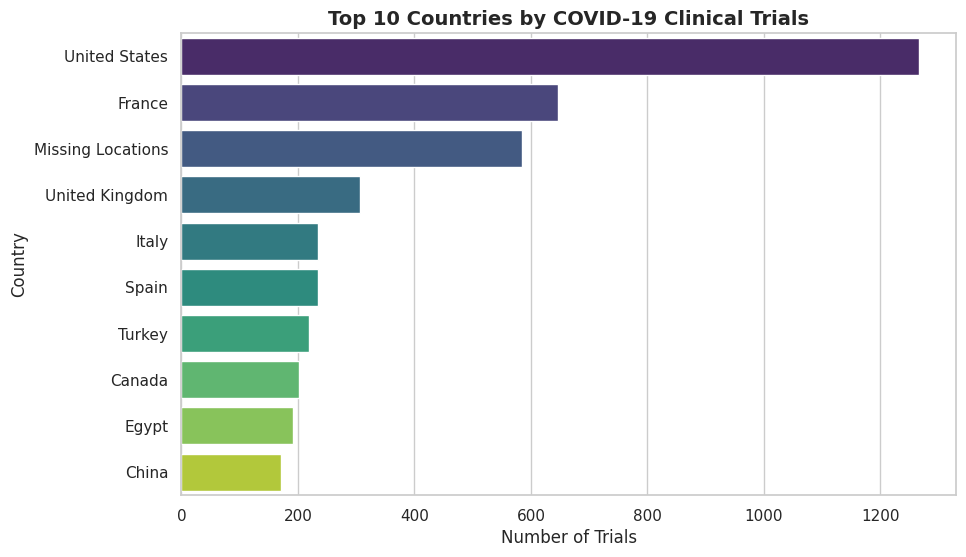

In [16]:
top_countries = df['Country'].value_counts().head(10)

sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    palette="viridis"
)

plt.title("Top 10 Countries by COVID-19 Clinical Trials", fontsize=14, fontweight="bold")
plt.xlabel("Number of Trials")
plt.ylabel("Country")
plt.show()

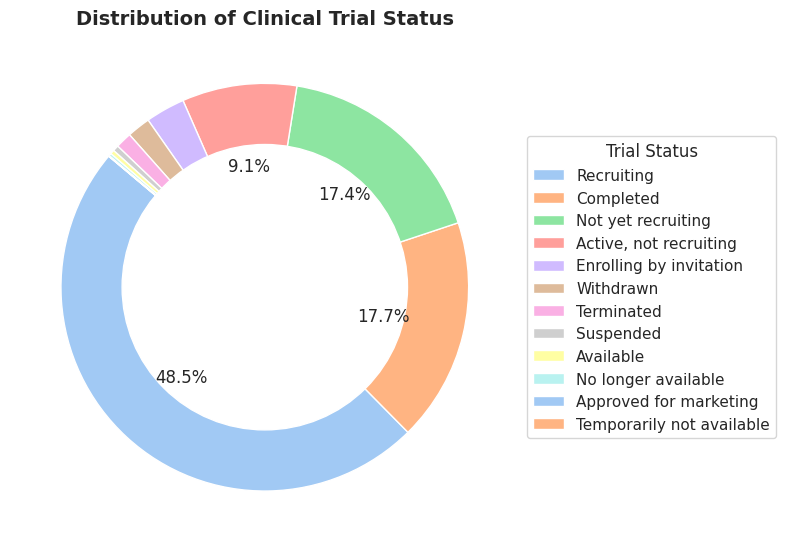

In [19]:
status_counts = df['Status'].value_counts()
colors = sns.color_palette("pastel")

def autopct_func(pct):
    return f'{pct:.1f}%' if pct > 5 else ''

plt.figure(figsize=(8,8))

wedges, texts, autotexts = plt.pie(
    status_counts,
    autopct=autopct_func,
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.legend(
    wedges,
    status_counts.index,
    title="Trial Status",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title("Distribution of Clinical Trial Status", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

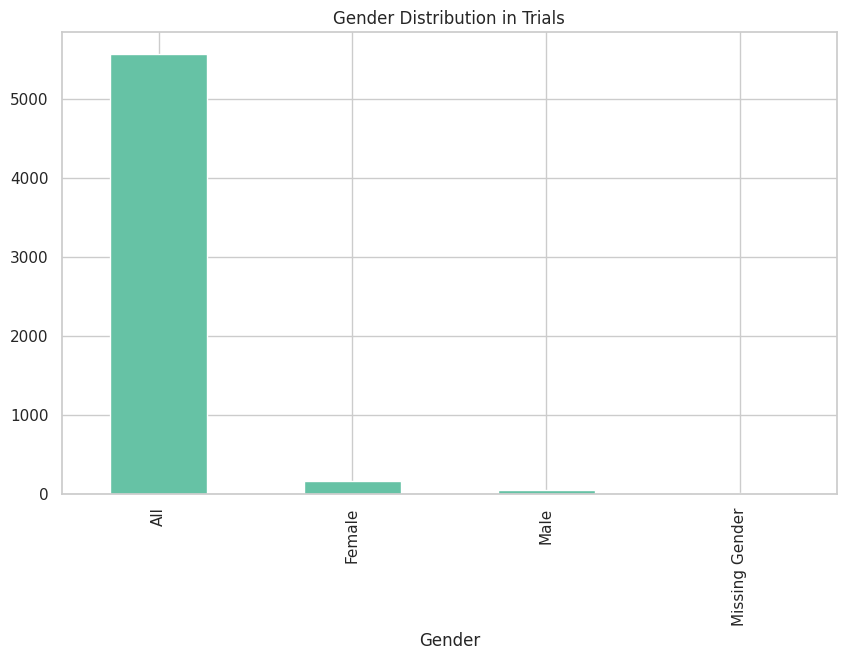

In [27]:
df['Gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution in Trials")
plt.show()

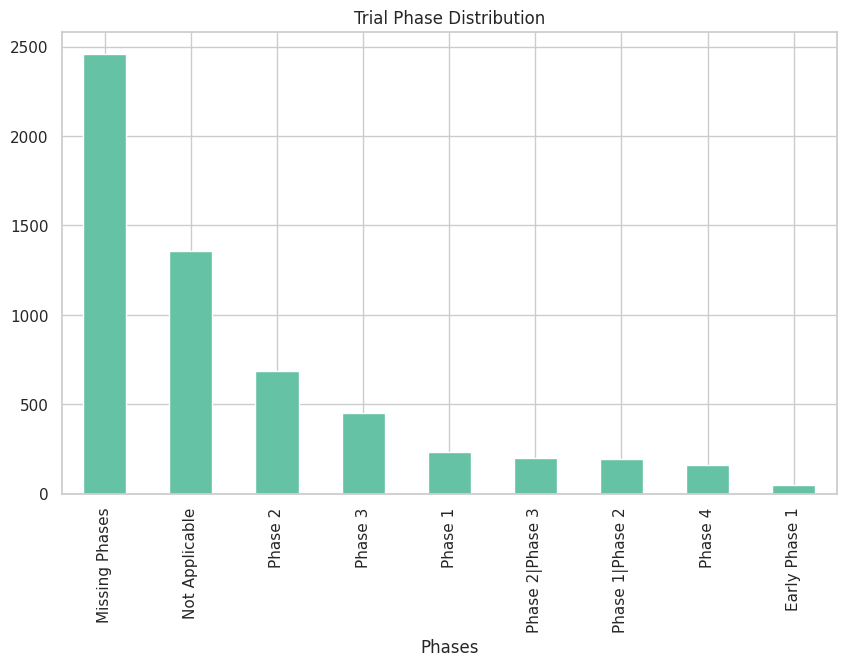

In [26]:
df['Phases'].value_counts().plot(kind='bar')
plt.title("Trial Phase Distribution")
plt.show()

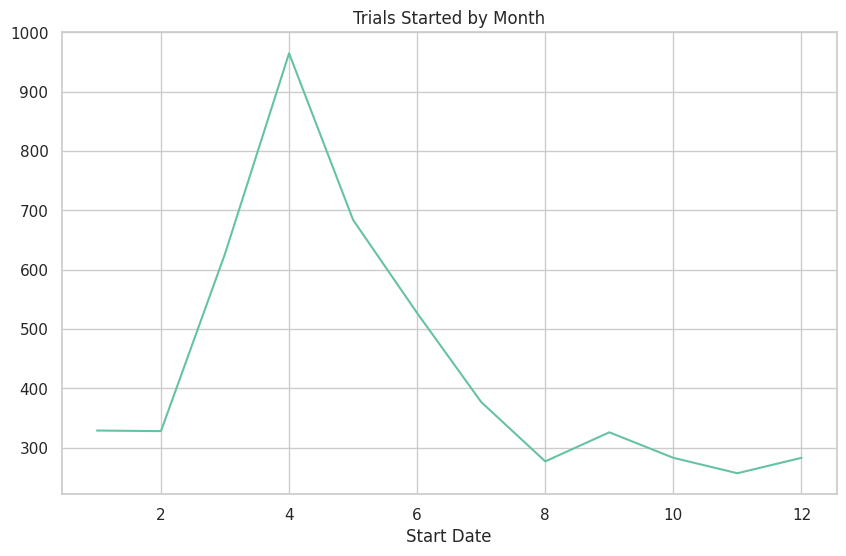

In [25]:
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['Start Date'].dt.month.value_counts().sort_index().plot(kind='line')
plt.title("Trials Started by Month")
plt.show()